<a href="https://colab.research.google.com/github/ispineda/DATA-SCIENCE-EMTECH/blob/main/Proyecto%2002/ANALISIS_02_PINEDA_JES%C3%9AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO 2. INTRODUCCIÓN AL ANÁLISIS CON DATOS CON PYTHON

*Emtech Student*: Jesús Ismael Pineda Hernández

### **DESCRIPCIÓN DEL CASO**

***Synergy Logistics*** es una empresa dedicada a la intermediación de servicios de importación y exportación de diferentes productos. Actualmente la empresa cuenta con una base de datos que refleja las rutas más importantes que opera desde el año 2015, con su respectivo origen y destino, año, producto, modo de transporte y valor total. Su propósito, es que a partir de estos datos se genere un análisis que sirva de la base para la estructuración de su estrategia operativa.


### **CONSIGNA**

La Dirección de Synergy Logistics ha solicitado al equipo operativo, realizar una propuesta que permita enfocar las prioridades de la estrategia operativa 2021; para ello, se plantea analizar la viabilidad de 3 opciones de enfoque: rutas de importación y exportación, medio de transporte utilizado y valor total de importaciones y exportaciones. Considerando que eres el data analyst del equipo, se te solicita que 
realices un análisis de los siguientes puntos e identifiques cuál(es) de ellos es la mejor opción para la empresa:

**Opción 1) Rutas de importación y exportación** Synergy logistics está considerando la posibilidad de enfocar sus esfuerzos en las 10 rutas más demandadas. Acorde a los flujos de importación y exportación, ¿Cuáles son esas 10 rutas?¿Le conviene implementar esa estrategia?¿Por qué?

**Opción 2) Medio de transporte utilizado**. ¿Cuáles son los 3 medios de transporte 
más importantes para Synergy logistics considerando el valor de las  importaciones y exportaciones? ¿Cuál es medio de transporte que podrían reducir? 

**Opción 3) Valor total de importaciones y exportaciones** Si Synergy Logistics 
quisiera enfocarse en los países que le generan el 80% del valor de las 
exportaciones e importaciones ¿en qué grupo de países debería enfocar sus 
esfuerzos?

**A partir del análisis de las opciones anteriores, ¿Cuál opción u opciones es conveniente implementar como base en la estrategia?**

Justifica a la dirección tu recomendación en forma de un reporte respaldado por datos y análisis en una extensión máxima de 1.5 cuartillas.

En el siguiente link, puedes descargar el archivo para la ejecución del proyecto:
https://github.com/emtechinstitute/data-science-proyecto2

### **INSTRUCCIONES**

Se recomienda correr los bloques de código en orden descendente de manera ordenada, para poder corroborar los datos obtenidos.

### **SOLUCIÓN**

A continuación se muestra el desarrollo para la resolución del caso práctico. 

La solución hace uso de los conocimientos adquiridos durante el curso: Introducción al análisis de datos con python, considerando operaciones con listas, tuplas, conjuntos, diccionarios, función len() y sum(), desestructuración, función zip, función enumerate, funciones propias y funciones anonimas (lambda). 

Así mismo se ejemplifica la carga de un csv a un diccionario mediante url. 

***Nota:*** *Además se ha hecho uso de las librerías para visualización de datos, matplotlib y searborn.*

In [1]:
import csv        # Módulo para utilizar csv
import requests   # Módulo para solicitudes 

# Librerías para visualización de datos
import seaborn as sns 
import matplotlib.pyplot as plt

#### Funciones propias para manejar los de datos como diccionarios

In [2]:
# ┌───────────────────────────────────────────────────────────────────┐
#                     Crea diccionario (tabla)
# └───────────────────────────────────────────────────────────────────┘
def data(matrix, columns = []):
  values = list(map(list, zip(*matrix))) # Transpuesta de datos
  return dict(zip(columns, values))      # Crea diccionario

# ┌───────────────────────────────────────────────────────────────────┐
#             Función que obtiene la dimensión de la tabla
# └───────────────────────────────────────────────────────────────────┘
def dim(data):
  data_copy = data.copy()                 # Copia diccionario
  names_columns = list(data_copy.keys())  # Obtiene nombres de columnas
  
  # Obtiene el número de filas
  long_data_name = 0
  num_rows = 0
  for name in names_columns:  # Prueba obtener al menos una longitud
    try:                      # Prueba obtener longitud de una columna
      long_data_name = len(data_copy[name])
      if num_rows < long_data_name:
        num_rows = long_data_name
    except:
      pass
  return (num_rows, len(data))  # Retorna número de filas y columnas

# ┌───────────────────────────────────────────────────────────────────┐
#         Obtiene los datos de una tabla según sus posiciones           
# └───────────────────────────────────────────────────────────────────┘
def extract_data(data, positions):

  data_copy = data.copy()
  matrix = []

  for name in list(data_copy.keys()): # Obtiene columnas
    list_improve = []
    for position in positions:        # Recorre posiciones a quedarse
      list_improve.append(data_copy[name][position])
    matrix.append(list_improve)       # Almacena posiciones
  return dict(zip(list(data_copy.keys()), matrix)) # Crea y retorna nueva tabla

# ┌───────────────────────────────────────────────────────────────────┐
#        Obtiene tabla con número de filas definidas           
# └───────────────────────────────────────────────────────────────────┘
def head(data, num_rows = 5):

  data_copy = data.copy()
  num_rows_data, _= dim(data_copy) # Obtiene dimensiones de filas

  # Establece número de filas
  if num_rows_data < num_rows:
    num_rows = num_rows_data 
  
  positions = range(num_rows) # Obtiene vector de posiciones a recuperar
  return extract_data(data_copy, positions) # Crea nueva tabla depurada
  
# ┌───────────────────────────────────────────────────────────────────┐
#        Filtra datos de la tabla con función de filtrado (lambda)           
# └───────────────────────────────────────────────────────────────────┘
def filters(data, column, function_filter):
  
  data_copy = data.copy()

  # Crea vector donde se cumple el filtro
  filter = list(map(function_filter, data_copy[column])) 

  # Obtiene posiciones del vector donde se cumple el filtro
  positions = []
  [positions.append(i) for i, element in enumerate(filter) if element]
  return extract_data(data_copy, positions) # Crea nueva tabla depurada

# ┌───────────────────────────────────────────────────────────────────┐
#   Redimensiona número de caracteres de una cadena (Visualización)           
# └───────────────────────────────────────────────────────────────────┘
def resize_text_vector(vector, num_space):

  vector_new = [] 
  for element in vector: # Obtiene vector al que se le agregarán espacios
    while len(element) < num_space:
      element = ' ' + element 
    if len(element) > num_space:
      element = element[:num_space]
    vector_new.append(element)

  return vector_new # Retorna vector tipo cadena con espacios

# ┌───────────────────────────────────────────────────────────────────┐
#         Función que muestra el diccionario en forma de tabla           
# └───────────────────────────────────────────────────────────────────┘
def show(data, app_num_space = False,  num_space = 10, rows_scope = 1000 ):
  data_copy = data.copy()                 # Copia diccionario
  num_rows, num_columns = dim(data_copy)  # Obtiene dimensiones de tabla

  # Obtiene límite de filas a visualizar
  if num_rows >= rows_scope:
    data_copy = head(data_copy, rows_scope)

  columns = list(data_copy.keys()) # Obtiene nombre de columnas

  max_spaces = []
  if not app_num_space:
    for column in columns: # Encuentra número máximo de espacios por columna
      data_copy[column] = list(map(str, data_copy[column]))
      max_space = max(list(map(len, data_copy[column])))
      min_space = len(str(column)) 
      if max_space < min_space:     # Establace número máximo por columna
        max_space = min_space
      max_spaces.append(max_space)  # Almacena número máximo por columna
  else:
    # Crea vector con espacios por columna predefinidos 
    [max_spaces.append(num_space) for count in range(len(columns))]

  # Obtiene nueva matriz con espacios definidos
  values_columns = []
  for item, column in enumerate(columns):
    values_columns.append(resize_text_vector(data_copy[column], max_spaces[item]))
  
  # Prepara datos para la impresión
  new_columns = []
  for item, column in enumerate(columns):
    new_columns += resize_text_vector([column], max_spaces[item])
  
  # Crea transpuesta de los datos
  transposte = list(map(list, zip(*values_columns)))

  # Imprime Item de fila
  print('item |', end='\t')
  for name in new_columns:
    print(f'{name}', end=' ')
  print('')

  for i, row in enumerate(transposte): # Imprime los datos de la tabla
    print(f'{i+1}-', end='\t')
    for element in row:
      print(element, end=' ')
    print('')
  
  # Muestra resumen de filas y truncamiento
  print(f'Dimensión de la tabla ({num_rows}, {num_columns})')
  print(f'Se ha limitado de la impresión {i+1} elementos de {num_rows}', end='\n\n')

# ┌───────────────────────────────────────────────────────────────────┐
#          Obtiene columna de valores únicos desordenados           
# └───────────────────────────────────────────────────────────────────┘
def unique(vector):
  return list(set(vector)) # Retonar valores únicos

# ┌───────────────────────────────────────────────────────────────────┐
#       Función para convertir el tipo de dato de una columna 
# └───────────────────────────────────────────────────────────────────┘
def mutate(vector, function_convert):
  return list(map(function_convert, vector ))

# ┌───────────────────────────────────────────────────────────────────┐
#     Función para obtener el tipo de dato general de las columnas           
# └───────────────────────────────────────────────────────────────────┘
def types(data):

  data_copy = data.copy()

  columns = list(data.keys())               # Obtiene nombre de columnas
  columns = list(map(str, columns))         # Convierte a strings los nombres
  max_space = max(list(map(len, columns)))  # Obtiene dimensión máxima de espacios
  
  # Acopla todos los nombres para tener le mismo número de espacios
  columns_adapt = resize_text_vector(columns, max_space)

  print('Tipo de datos de las columnas')    
  # Busca el tipo de dato general de columna
  for name_adapt, name in zip(columns_adapt, columns):    
    print(name_adapt, end=':\t')
    type_data = unique(list(map(lambda x: type(x), data[name])))

    if len(type_data) > 1:
      print("[<class 'mix'>]") # Muestra tipo de dato mixto (Object)
    else:
      print(type_data)
  print('')

# ┌───────────────────────────────────────────────────────────────────┐
#     Función que ordena tabla a través de valores de una columna           
# └───────────────────────────────────────────────────────────────────┘
def sort_by(data, column, ascending = True):
  data_copy = data.copy()
  
  # Ordena valores únicos de columna
  unique_values = sorted(unique(data[column]), reverse = not ascending)
  
  columns = list(data_copy.keys()) # Obtiene nombres (clave)

  sort_dict = dict() 
  for i, unique_value in enumerate(unique_values): # Filtra valores de columna
    
    # Filtra filas con valores de manera ordenada
    x = filters(data_copy, column, function_filter= lambda value: value == unique_value)
    for name_column in columns:
      if i == 0:
        sort_dict[name_column] = x[name_column]  # Crea base de vector
      else:
        sort_dict[name_column] += x[name_column] # Agrega valores a la pila - ordenados

  return sort_dict # Retorna diccionario nuevo

# ┌───────────────────────────────────────────────────────────────────┐
#     Función que retorna lista de tablas agrupadas por dato 
# └───────────────────────────────────────────────────────────────────┘
def group_by(data, column):
  data_copy = data.copy()
  unique_values = sorted(unique(data[column])) # Ordena valores únicos
  
  columns = list(data_copy.keys())

  group = []
  for i, unique_value in enumerate(unique_values):
    group.append(filters(data_copy, column, function_filter = lambda value: value==unique_value))
  
  return [unique_values, group] # Retorna vector con valores y grupo ordenado

# ┌───────────────────────────────────────────────────────────────────┐
#          Función para contar valores  (frecuencia de un datos)         
# └───────────────────────────────────────────────────────────────────┘
def count_values(data, column):
  data_copy = data.copy()

  values = unique(data_copy[column])  # Obtiene valores únicos
  column_count = 'count_'+column      # Determina nombre de nueva columna
  
  dict_count = dict()
  counts = [] 
  # Cuenta valores repetidos por valores únicos
  [counts.append(data_copy[column].count(value)) for value in values]

  # Crea diccionario con valores
  dict_count[column] = values
  dict_count[column_count] = counts
  return dict_count # Devuelve diccionario

#### Análisis exploratorio

In [3]:
# Enlace del csv proporcionado
url = 'https://raw.githubusercontent.com/emtechinstitute/data-science-proyecto2/master/synergy_logistics_database.csv'

with requests.Session() as rqs: # Inicio de solicitud
  download = rqs.get(url).content.decode('latin-1') # Descarga csv
  csv_data = list(csv.reader(download.splitlines(), delimiter=',')) # Abre y retorna elementos del csv en lista para usarse con función data()

del(csv_data[0]) # Elimina cabecera por error de caracteres ['register_id']

# Crea tabla (diccionario)
sl_data = data(csv_data, columns = ['register_id','direction','origin','destination','year','date','product','transport_mode','company_name','total_value'])  

show(sl_data, rows_scope=20) # Visualiza datos de la tabla con 100 salidas

item |	register_id direction origin destination year     date                   product transport_mode company_name total_value 
1-	          1   Exports  Japan       China 2015 31/01/15                      Cars            Sea        Honda    33000000 
2-	          2   Exports  Japan       China 2015 01/02/15                      Cars            Sea        Honda    16000000 
3-	          3   Exports  Japan       China 2015 02/02/15                      Cars            Sea        Honda    29000000 
4-	          4   Exports  Japan       China 2015 03/02/15                      Cars            Sea        Honda    14000000 
5-	          5   Exports  Japan       China 2015 04/02/15                      Cars            Sea        Honda    17000000 
6-	          6   Exports  Japan       China 2015 05/02/15                      Cars            Sea        Honda    20000000 
7-	          7   Exports  Japan       China 2015 06/02/15                      Cars            Sea        Honda    270000

#### Corrección de datos

In [4]:
# Crea una nueva columna con la ruta completa (origin - destination)
sl_data['route'] = list(map(lambda origin, destination: str(origin) +' - '+ str(destination), sl_data['origin'], sl_data['destination']))

# Imprime el tipo de dato de la columna
print('Tipo de datos de columna - Antes')
types(sl_data)

# Debido a que no se solicita examinar ninguna de las siguientes columnas
# se descartaron para aligeraar la visualización
del[sl_data['register_id']]
del[sl_data['company_name']]
del[sl_data['product']]
del[sl_data['date']]
del[sl_data['year']]

sl_data['total_value'] = mutate(sl_data['total_value'], float )

# Imprime el tipo de dato de la columna después de mutar
print('Tipo de datos de columna - Después')
types(sl_data)
show(sl_data, rows_scope=20)

Tipo de datos de columna - Antes
Tipo de datos de las columnas
   register_id:	[<class 'str'>]
     direction:	[<class 'str'>]
        origin:	[<class 'str'>]
   destination:	[<class 'str'>]
          year:	[<class 'str'>]
          date:	[<class 'str'>]
       product:	[<class 'str'>]
transport_mode:	[<class 'str'>]
  company_name:	[<class 'str'>]
   total_value:	[<class 'str'>]
         route:	[<class 'str'>]

Tipo de datos de columna - Después
Tipo de datos de las columnas
     direction:	[<class 'str'>]
        origin:	[<class 'str'>]
   destination:	[<class 'str'>]
transport_mode:	[<class 'str'>]
   total_value:	[<class 'float'>]
         route:	[<class 'str'>]

item |	direction origin destination transport_mode total_value         route 
1-	  Exports  Japan       China            Sea  33000000.0 Japan - China 
2-	  Exports  Japan       China            Sea  16000000.0 Japan - China 
3-	  Exports  Japan       China            Sea  29000000.0 Japan - China 
4-	  Exports  Japan     

#### OPCIONES

##### Opción 1


Tab1. Importaciones y Exportaciones
item |	                route count_route sum_total_values 
1-	South Korea - Vietnam         497     6877007000.0 
2-	Netherlands - Belgium         437     3238142000.0 
3-	    USA - Netherlands         436     1032187000.0 
4-	       Japan - Mexico         385     5829000000.0 
5-	       China - Mexico         351    12494000000.0 
6-	        China - Japan         343     5891000000.0 
7-	      Germany - China         328     3495875000.0 
8-	       Japan - Brazil         306     3368155000.0 
9-	     Germany - France         299     2902214000.0 
10-	  South Korea - Japan         294     4741000000.0 
Dimensión de la tabla (10, 3)
Se ha limitado de la impresión 10 elementos de 10

El total de valores de las 10 rutas más demandadas es:  49868580000.0

Tab2. 10 rutas con mayor valor
item |	                  route count_route sum_total_values 
1-	         China - Mexico         351    12494000000.0 
2-	        Canada - Mexico         261     8450000000

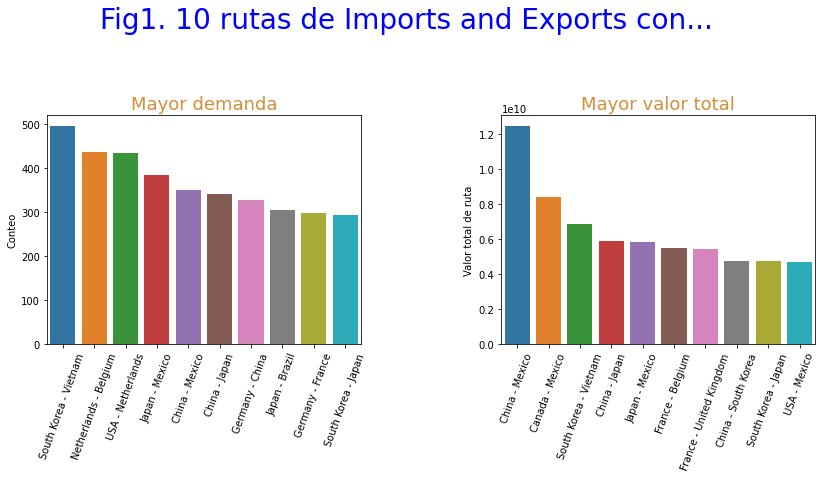

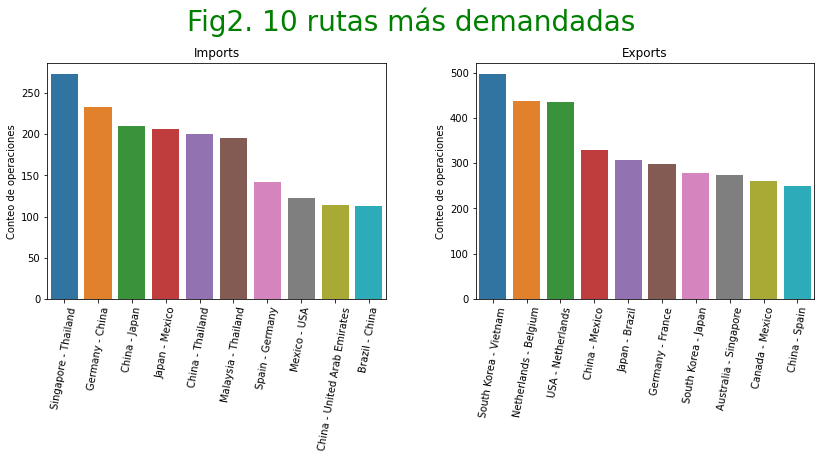

In [5]:
# Imprime rutas más demandadas
print('Tab1. Importaciones y Exportaciones')
data_routes = count_values(sl_data,'route') # Obtiene la frecuencia en la que se usan las rutas

sum_total_values = []
for route in data_routes['route']:
  route = filters(sl_data,'route', lambda value: value == route) # Filtra por ruta
  sum_total_values.append(sum(route['total_value']))             # Da suma de valores totales por ruta
data_routes['sum_total_values'] = sum_total_values               # Crea nueva columna con valores por ruta

# Obtiene las 10 rutas más demandadas
count_route = head(sort_by(data_routes,'count_route',ascending = False), 10)
show(count_route) # Muestra 10 rutas más demandadas
count_route_sum_total = sum(count_route['sum_total_values'])
print('El total de valores de las 10 rutas más demandadas es: ', count_route_sum_total, end='\n\n')

# Obtiene las 10 rutas con mayor total de valores
total_values = head(sort_by(data_routes,'sum_total_values',ascending=False), 10)
print('Tab2. 10 rutas con mayor valor')
show(total_values) # Muestra 10 rutas con mayor total de valores
total_values_sum_total = sum(total_values['sum_total_values'])
print('El total de valores de las 10 rutas con más valor es: ', total_values_sum_total, end="\n\n")

print('¿Las 10 rutas más demandadas tienen los valores totales más altos?:', count_route_sum_total > total_values_sum_total, end='\n\n')

# Prepara visualización de gráficos
fg1 = plt.figure(figsize = (14, 8))
axes_f1 = fg1.subplots(1, 2, sharex = False, sharey = False)

# Título
fg1.suptitle('Fig1. 10 rutas de Imports and Exports con... ', fontsize = 28, color= 'b');

# Imprime gráfico de barras con rutas con mayor demanda
ax_f1 = sns.barplot(x= count_route['route'], y=count_route['count_route'], ax= axes_f1[0])
ax_f1.set_title('Mayor demanda', fontsize = 18, c = '#D38F39')
ax_f1.set(ylabel='Conteo')
ax_f1.set_xticklabels(ax_f1.get_xticklabels(), rotation=70);

# Imprime gráfico de barras con rutas con mayor valor
ag_f1 = sns.barplot(x= total_values['route'], y=total_values['sum_total_values'], ax= axes_f1[1])
ag_f1.set_title('Mayor valor total', fontsize=18, c ='#D38F39')
ag_f1.set(ylabel='Valor total de ruta')
ag_f1.set_xticklabels(ag_f1.get_xticklabels(), rotation=70);

fg1.tight_layout(pad=10) # Separa gráficos visualmente

directions = unique(sl_data['direction']) # Obtiene las direcciones 
freq_routes_direction = []                # Almacena los conteos de las rutas
# Obtiene tabla con 10 elementos con mayor demanda por direction
for i, direction in enumerate(directions):
  # Filtra por direction
  group_direction = filters(data = sl_data, column = 'direction', function_filter = lambda value: value == direction)
  freq_routes = count_values(group_direction, 'route')      # Obtiene la frecuencia de aparición de la ruta
  freq_routes = sort_by(freq_routes, 'count_route', False)  # Ordena de mayor a menor
  freq_routes_10 = head(freq_routes, 10)                    # Obtiene 10 filas
  freq_routes_direction.append(freq_routes_10)              # Apila tabla resumida

  print(f'Tab{i+3}. {directions[i]}')
  show(freq_routes_10)                                      # Muestra tabla resumida

# Prepara espacio de impresión de gráficos
fig_2 = plt.figure(figsize = (12.6, 7))
axes_f2 = fig_2.subplots(1, len(directions), sharex = False, sharey = False)
fig_2.suptitle('Fig2. 10 rutas más demandadas', fontsize = 28, color= 'g');

# Imprime graficos de barra con las 10 rutas con mayor demanda por direction
for i, axe_f2 in enumerate(axes_f2.flat):
  sns.barplot(x = freq_routes_direction[i]['route'], y = freq_routes_direction[i]['count_route'], ax = axe_f2)
  axe_f2.set_title(f'{directions[i]}')
  axe_f2.set(ylabel='Conteo de operaciones')
  axe_f2.set_xticklabels(axe_f2.get_xticklabels(), rotation=80)

fig_2.tight_layout(pad=5) # Separa gráficos visualmente

##### Opción 2


Tab5. Frecuencia del uso de transporte y valores
item |	transport_mode count_transport_mode total_values_transport 
1-	           Sea                10688         100530622000.0 
2-	          Rail                 3381          43628043000.0 
3-	          Road                 2598          33270486000.0 
4-	           Air                 2389          38262147000.0 
Dimensión de la tabla (4, 3)
Se ha limitado de la impresión 4 elementos de 4



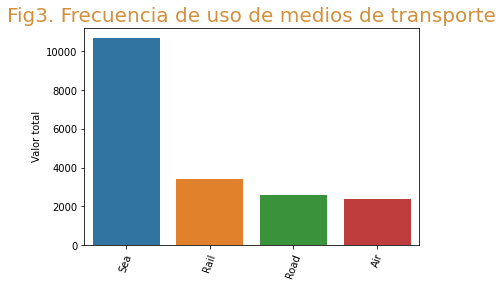

In [6]:
# Ordena datos de la frecuencia de uso de cada modo de transporte
data_transport_mode = sort_by(count_values(sl_data, 'transport_mode'), column='count_transport_mode', ascending=False)

# Agrega valor del total de valor por modo de transporte
total_values_transport_mode = []
for transport in data_transport_mode['transport_mode']:
  data_by_transport = filters(sl_data, 'transport_mode', lambda value: value == transport)
  total_values_transport_mode.append(sum(data_by_transport['total_value']))
data_transport_mode['total_values_transport'] = total_values_transport_mode

# Imprime tabla
print('Tab5. Frecuencia del uso de transporte y valores')
show(data_transport_mode)

# Imprime gráfica de la frecuencia del uso de medios de transporte
ax_f3 = sns.barplot(x=data_transport_mode['transport_mode'], y=data_transport_mode['count_transport_mode'])
ax_f3.set_title('Fig3. Frecuencia de uso de medios de transporte', fontsize = 20, c = '#D38F39')
ax_f3.set_ylabel('Valor total')
ax_f3.set_xticklabels(ax_f3.get_xticklabels(), rotation=70);

##### Opción 3

Tab6. Porcentaje del valor total por pais
item |	             country percentage 
1-	               China     20.961 
2-	                 USA     10.963 
3-	               Japan      9.292 
4-	              France       9.24 
5-	         South Korea      8.582 
6-	             Germany      7.229 
7-	              Russia      6.525 
8-	              Canada      5.217 
9-	               Italy      3.076 
10-	               Spain      2.976 
11-	              Mexico      2.801 
12-	         Netherlands       1.91 
13-	           Singapore      1.863 
14-	            Malaysia      1.651 
15-	      United Kingdom      1.403 
16-	              Brazil      1.281 
17-	               India      1.217 
18-	             Belgium        1.2 
19-	           Australia      1.192 
20-	         Switzerland      0.999 
21-	             Vietnam       0.25 
22-	United Arab Emirates      0.172 
23-	             Austria      0.001 
Dimensión de la tabla (23, 2)
Se ha limitado de la impresión 23 elementos de

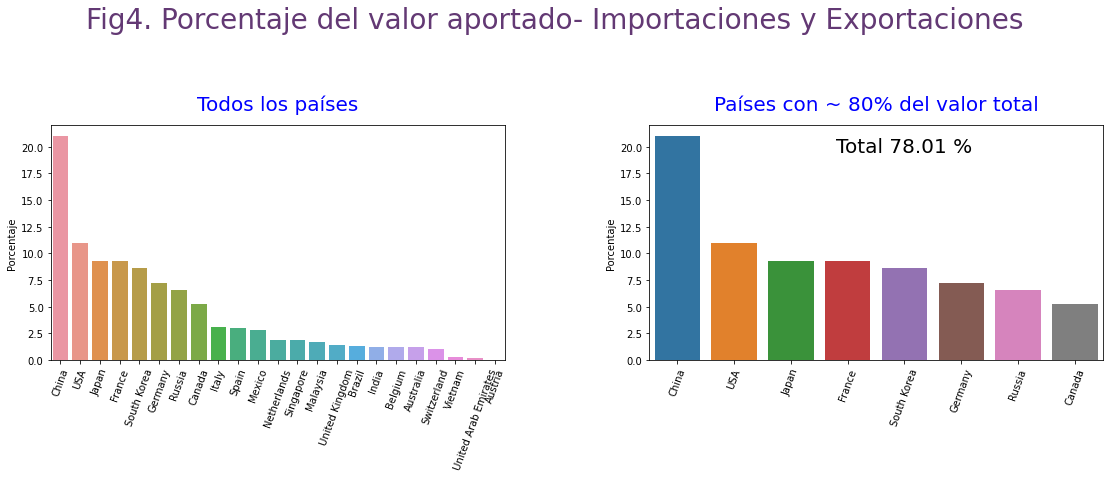

In [8]:
countrys = unique(sl_data['origin'])    # Obtiene los países
total_sum = sum(sl_data['total_value']) # Suma todos los valores de importaciones y exportaciones

# Crea matriz de países con sus porcentajes de importaciones y exportaciones
matrix = []
for country in countrys: 
  filter_country = filters(sl_data, 'origin', lambda value: value == country)
  sum_total_country = sum(filter_country['total_value'])
  percentage = (sum_total_country/total_sum) * 100
  matrix.append([country, round(percentage,3)])

# Convierte matriz de países y porcentajes a tabla
country_percentage = data(matrix, columns=['country', 'percentage'])
country_percentage = sort_by(country_percentage, 'percentage', ascending=False) # Ordena tabla
print('Tab6. Porcentaje del valor total por pais')
show(country_percentage)  # Muestra tabla


# Analiza que países generan el 80%  de valor de importaciones y exportaciones
matrix = []
percentage_accum = 0
for country, percentage in zip(country_percentage['country'], country_percentage['percentage']):
  percentage_accum += round(percentage,2)
  matrix.append([country, round(percentage,2)])
  if percentage_accum >= 80:  # Detiene en 80% o más
    matrix.pop()
    percentage_accum -= round(percentage,2)
    break

percentage_80 = data(matrix = matrix, columns=['country', 'percentage'])
print('Tab7. países que conforman aprox el 80% del valor total')
show(percentage_80)

fig_f4, ax_f4 = plt.subplots(1,2, figsize=(18,8))
fig_f4.suptitle('Fig4. Porcentaje del valor aportado- Importaciones y Exportaciones', fontsize = 28, color= '#633974');

ax_f4[0].set_title('Todos los países', c='b', fontsize = 20, pad = 15)
ax_f4[0].set_ylabel('Porcentaje')
sns.barplot(y = country_percentage['percentage'], x=country_percentage['country'], ax = ax_f4[0])
ax_f4[0].set_xticklabels(ax_f4[0].get_xticklabels(), rotation=70);

ax_f4[1].set_title('Países con ~ 80% del valor total', c = 'b', fontsize = 20, pad= 15)
ax_f4[1].set_ylabel('Porcentaje')
sns.barplot(y = percentage_80['percentage'], x=percentage_80['country'], ax = ax_f4[1])
ax_f4[1].set_xticklabels(ax_f4[1].get_xticklabels(), rotation=70);
ax_f4[1].text(x = 4 , y = 20,s = f'Total {percentage_accum} %', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20)

fig_f4.tight_layout(pad = 10) # Separa gráficos visualmente

print('Porcentaje acumulado', percentage_accum, '%', end='\n\n')

### **CONCLUSIÓN**

Opción 1).  Acorde a los flujos de importación y exportación, 
* ¿Cuáles son esas 10 rutas? 

Las rutas más demandadas se muestran en la **Tab1** y **Tab2** (***Fig1***) para importaciones y exportaciones de manera conjunta y de manera separada en la **Tab3** y **Tab4** (***Fig2***).

* ¿Le conviene implementar esa estrategia? 

No, pero si se puede requerir el conocimiento de las rutas más usadas para poder decidir que medio de transporte reducir.

* ¿Por qué? 

Si bien el conocer las rutas puede ayudar a tener un mayor entendiminto de los flujos y transacciones entre países por la empresa, esto no es completamente confiable debido a que no consideran el valor que implican las operaciones, así pues, pueden existir rutas que no son tan demandadas pero que si generan un valor significativo en costos para la empresa, y otras rutas que son sumamente demandadas pero el valor es menor. 


Opción 2). 

* ¿Cuáles son los 3 medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones? 

Los modos de transportes más demandados se muestran en la **Tab5** (***Fig3***), siendo el modo aereo el que cuenta con la menor cantidad de operaciones realizadas.

* ¿Cuál es medio de transporte que podrían reducir? 

El medio de tranporte Aereo es aquel que se podría reducir, esto es debido a que cuenta con la menor cantidad de operaciones realizadas y su costo es superior al transporte por carretera, también, debido a que un barco puede mover más carga que un avión, este último suele ser un medio de transporte poco rentable.

Opción 3). 

Si Synergy Logistics quisiera enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones 

*  ¿En qué grupo de países debería enfocar sus esfuerzos?

El grupo de países con mayor valor que le generan aproximadamente el 80% del valor de las importaciones y exportaciones se muestra en la **Tab7** (***Fig4***), el porcentaje de cada países se muestra en la Tab8.

Estrategia. Opción 2 y Opción 3

En base a los datos se sugiere considerar a los países que generan el 80% del valor total de importaciones y exportaciones, esto debido a que los países cuentan con diversas rutas generadoras de valor. Así mismo, las rutas más demandadas también aparecen entre los países generadores del 80% del valor. El enfocarse en un grupo de países puede ayudar a reducir aún más los medio de transporte utilizados, siendo de antemano conveniente evaluar el reducir el uso vía aéreo por sus altos costos y baja cantidad de operaciones, considerando el medio marítimo primero.